# Snow data

## Import libraries

In [2]:
"""Basic ones"""
import polars as pl
from plotnine import *
import matplotlib.pyplot as plt
plt.show()  # for display figures after ggplot
# plt.rcParams['axes.grid'] = True
import numpy as np
import seaborn as sns
import pandas
import statsmodels.api as sm
from datetime import datetime

import warnings
warnings.simplefilter("ignore")

/home/kota/anaconda3/envs/bayes/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4


## Load data

- 最深積雪(cm)
- ~~最深積雪(cm)現象なし情報~~
- ~~最深積雪(cm)時分~~
- ~~最深積雪(cm)時分現象なし情報~~
- 降雪量合計(cm)
- ~~降雪量合計(cm)現象なし情報~~

In [3]:
file_name = "../../data/weather/snow.csv"
df = pl.read_csv(file_name, encoding="shift-jis", skip_rows=3)
display(df.columns)
df.columns = ["date", "day_of_week", "max_depth", "max_depth_info", "max_depth_time", \
                "max_depth_time_info", "total_snowfall", "total_snowfall_info"]
df = df.drop(["max_depth_time", "max_depth_time_info"])
df = df.with_columns(pl.col("date").str.strptime(pl.Date, "%Y/%m/%d")) # convert day column data type into date type
df.head()

['年月日',
 '曜日',
 '最深積雪(cm)',
 '最深積雪(cm)現象なし情報',
 '最深積雪(cm)時分',
 '最深積雪(cm)時分現象なし情報',
 '降雪量合計(cm)',
 '降雪量合計(cm)現象なし情報']

date,day_of_week,max_depth,max_depth_info,total_snowfall,total_snowfall_info
date,str,i64,i64,i64,i64
2017-07-01,"""土""",0,1,0,1
2017-07-02,"""日""",0,1,0,1
2017-07-03,"""月""",0,1,0,1
2017-07-04,"""火""",0,1,0,1
2017-07-05,"""水""",0,1,0,1


In [4]:
df

date,day_of_week,max_depth,max_depth_info,total_snowfall,total_snowfall_info
date,str,i64,i64,i64,i64
2017-07-01,"""土""",0,1,0,1
2017-07-02,"""日""",0,1,0,1
2017-07-03,"""月""",0,1,0,1
2017-07-04,"""火""",0,1,0,1
2017-07-05,"""水""",0,1,0,1
…,…,…,…,…,…
2024-05-27,"""月""",0,1,0,1
2024-05-28,"""火""",0,1,0,1
2024-05-29,"""水""",0,1,0,1


## Check nulls

In [5]:
display(df.null_count())

nulls = df.hstack(df.transpose().select(pl.all().is_null().sum()).transpose().rename({"column_0": "null_count"}))
nulls.filter(pl.col("null_count") != 0)

date,day_of_week,max_depth,max_depth_info,total_snowfall,total_snowfall_info
u32,u32,u32,u32,u32,u32
0,0,0,0,0,0


date,day_of_week,max_depth,max_depth_info,total_snowfall,total_snowfall_info,null_count
date,str,i64,i64,i64,i64,u32


## Visualization

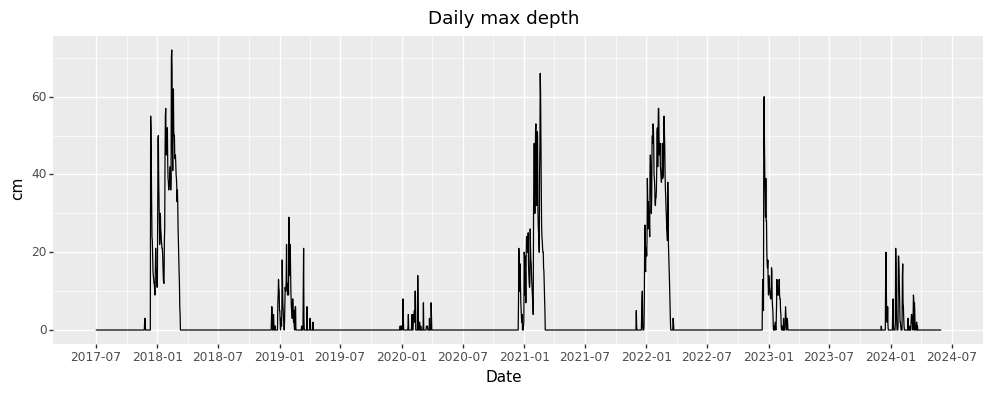

<ggplot: (8742714518682)>

In [6]:
(
    ggplot(data=df, mapping=aes(x="date"))
    + geom_line(aes(y="max_depth"))
    + labs(title="Daily max depth", x="Date", y="cm")
    + theme(figure_size=(12, 4))
    + scale_x_date(
    #     limits=(
    #         datetime(year=2018, month=1, day=1),
    #         datetime(year=2022, month=1, day=1)
    #     ),
        date_labels="%Y-%m",
        date_breaks="6 month",
    #     # expand=(0, 1),
    #     date_minor_breaks="1 month",
    )
)

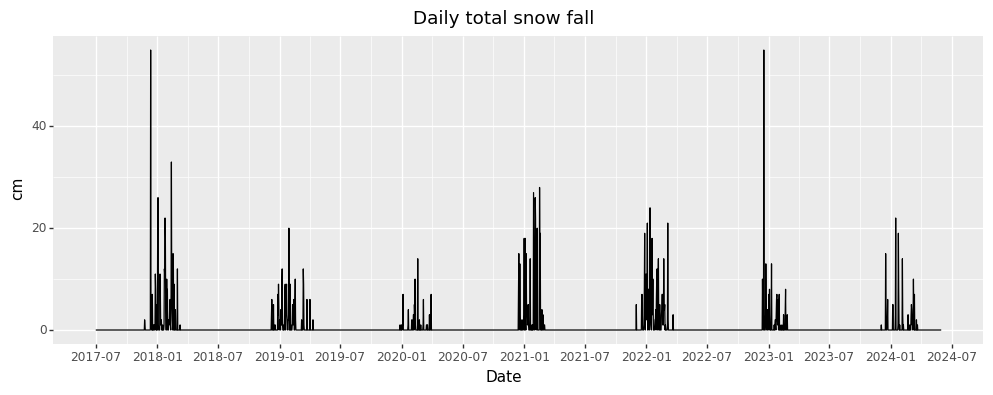

<ggplot: (8742713016468)>

In [7]:
(
    ggplot(data=df, mapping=aes(x="date"))
    + geom_line(aes(y="total_snowfall"))
    + labs(title="Daily total snow fall", x="Date", y="cm")
    + theme(figure_size=(12, 4))
    + scale_x_date(
    #     limits=(
    #         datetime(year=2018, month=1, day=1),
    #         datetime(year=2022, month=1, day=1)
    #     ),
        date_labels="%Y-%m",
        date_breaks="6 month",
    #     # expand=(0, 1),
    #     date_minor_breaks="1 month",
    )
)

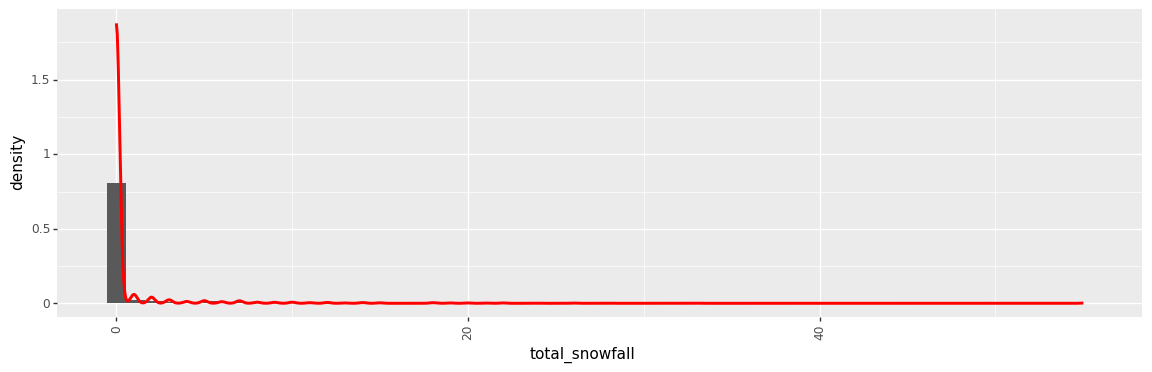

<ggplot: (8742625060810)>

In [12]:
(
    ggplot(data=df, mapping=aes(x="total_snowfall"))
    + geom_histogram(aes(y="..density.."))
    + geom_density(size=1.2, color="red")
    + theme(figure_size=(14, 4), axis_text_x=element_text(rotation=90))
    # + xlim(0, 100)
)

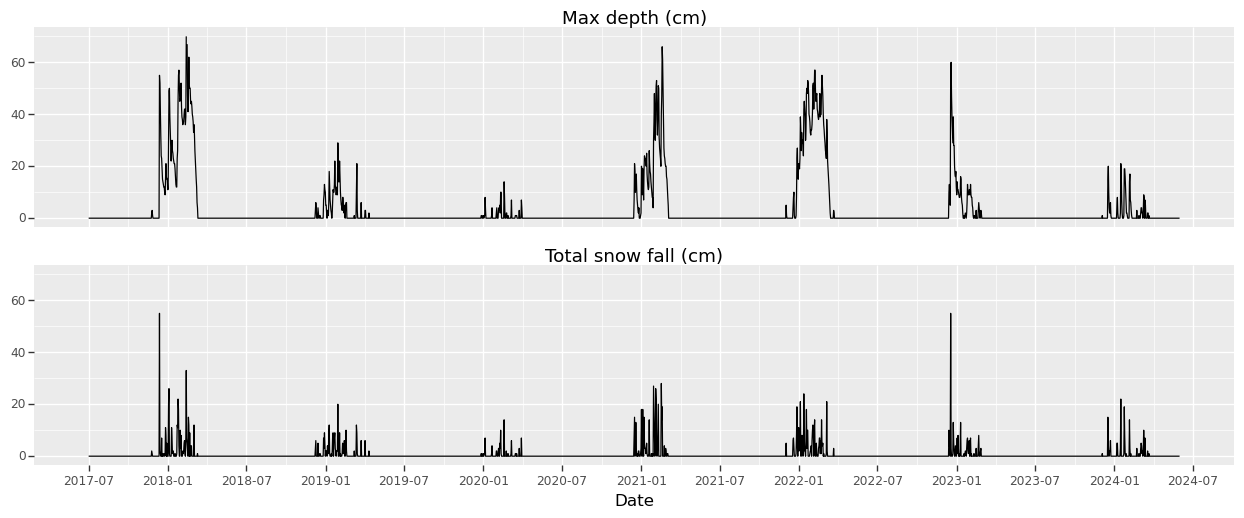

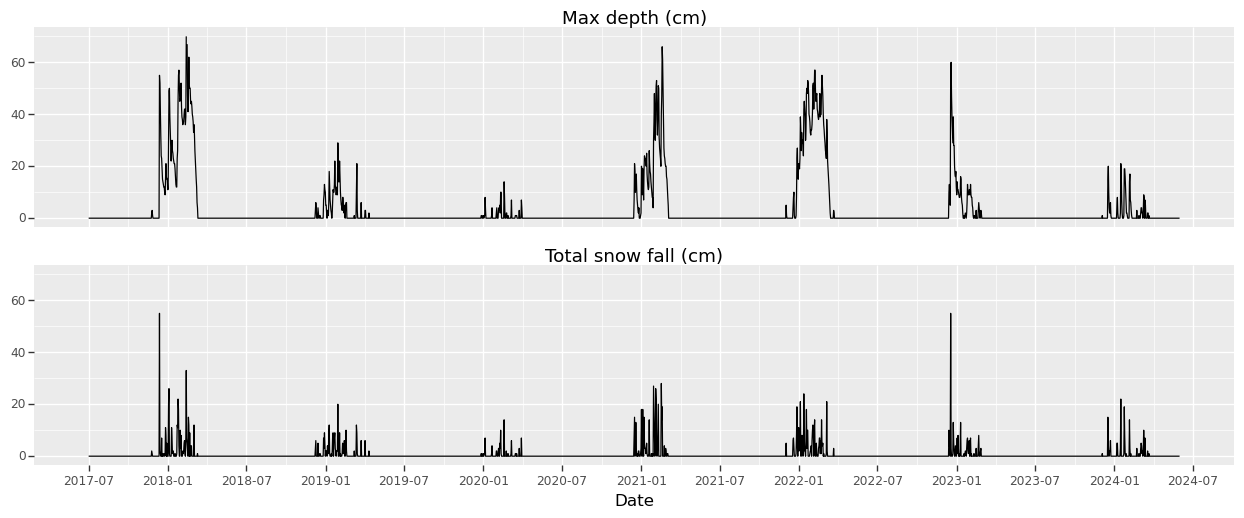

In [9]:
# https://github.com/has2k1/plotnine/issues/46
import patchworklib as pw


g1 = pw.load_ggplot(
    ggplot(data=df, mapping=aes(x="date"))
    + geom_line(aes(y="max_depth"))
    + labs(title="Max depth (cm)", x="Date", y="")
    + theme(figure_size=(12, 2), axis_title_x=element_blank(), axis_ticks_major_x=element_blank()
            , axis_ticks_minor_x=element_blank(), axis_text_x=element_blank())
    + scale_x_date(
        date_labels="%Y-%m",
        date_breaks="6 month",
    )
    + ylim(0, 70)
)

g2 = pw.load_ggplot(
    ggplot(data=df, mapping=aes(x="date"))
    + geom_line(aes(y="total_snowfall"))
    + labs(title="Total snow fall (cm)", x="Date", y="")
    + theme(figure_size=(12, 2))
    + scale_x_date(
        date_labels="%Y-%m",
        date_breaks="6 month",
    )
    + ylim(0, 70)
)

# By specifying g3 in (g3|g2), g1 is positioned exactly on g3.
pw.param["margin"] = 0.2
(
    g1 / g2
).savefig(fname="../../fig/weather/snow.png", dpi=500)